## Purpose: 
Determine the overall balance of the samples, between normal, deleted and amplifed gene regions. 
- create bar plots
- create histograms

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob as glob
import numpy as np

In [91]:
df_map = pd.read_csv('https://raw.githubusercontent.com/LaraLim/cnv-supervised-learning/refs/heads/main/sample_mapping.csv?token=GHSAT0AAAAAACXNJQCFXPY5VH5FEFSBG5NCZY67QXA')


combined_df = pd.DataFrame()

for filename in df_map['Filename']:
    url = f'https://raw.githubusercontent.com/LaraLim/cnv-supervised-learning/refs/heads/main/gene_level_cnv/{filename}'
    df = pd.read_csv(url, sep='\t')

    print(f'before transformations')
    
    #display the number of unique genes in each sample
    print(f'{filename} has {df["gene_name"].nunique()} unique genes')
    #display the number of rows in each sample
    print(f'{filename} has {df.shape[0]} rows')


    #drop the rows with missing values
    df.dropna(inplace=True)

    print('rows after dropping rows with missing values')
    #display the number of unique genes in each sample
    print(f'{filename} has {df["gene_name"].nunique()} unique genes')
    #display the number of rows in each sample
    print(f'{filename} has {df.shape[0]} rows')

    combined_df = pd.concat([combined_df, df.reset_index(drop=True)], ignore_index=True)


display(combined_df.head())

#display the bottom of the dataframe
display(combined_df.tail())

before transformations
ee5e869c-e15f-4899-9e12-377920609b42.wgs.ASCAT.gene_level.copy_number_variation.tsv has 59390 unique genes
ee5e869c-e15f-4899-9e12-377920609b42.wgs.ASCAT.gene_level.copy_number_variation.tsv has 60623 rows
rows after dropping rows with missing values
ee5e869c-e15f-4899-9e12-377920609b42.wgs.ASCAT.gene_level.copy_number_variation.tsv has 57242 unique genes
ee5e869c-e15f-4899-9e12-377920609b42.wgs.ASCAT.gene_level.copy_number_variation.tsv has 58398 rows
before transformations
f4f49853-5dbc-4b00-8ed0-3dffec3423cd.wgs.ASCAT.gene_level.copy_number_variation.tsv has 59390 unique genes
f4f49853-5dbc-4b00-8ed0-3dffec3423cd.wgs.ASCAT.gene_level.copy_number_variation.tsv has 60623 rows
rows after dropping rows with missing values
f4f49853-5dbc-4b00-8ed0-3dffec3423cd.wgs.ASCAT.gene_level.copy_number_variation.tsv has 57246 unique genes
f4f49853-5dbc-4b00-8ed0-3dffec3423cd.wgs.ASCAT.gene_level.copy_number_variation.tsv has 58403 rows
before transformations
cfe2f44c-ab6a-407

,gene_id,gene_name,chromosome,start,end,copy_number,min_copy_number,max_copy_number
0,ENSG00000223972.5,DDX11L1,chr1,11869,14409,4.0,4.0,4.0
1,ENSG00000227232.5,WASH7P,chr1,14404,29570,4.0,4.0,4.0
2,ENSG00000278267.1,MIR6859-1,chr1,17369,17436,4.0,4.0,4.0
3,ENSG00000243485.5,MIR1302-2HG,chr1,29554,31109,4.0,4.0,4.0
4,ENSG00000284332.1,MIR1302-2,chr1,30366,30503,4.0,4.0,4.0


,gene_id,gene_name,chromosome,start,end,copy_number,min_copy_number,max_copy_number
2229402,ENSG00000188399.5,ANKRD36P1,chrY,26409815,26420535,2.0,2.0,2.0
2229403,ENSG00000277146.1,AC013734.1,chrY,26453982,26454092,2.0,2.0,2.0
2229404,ENSG00000215506.5,TPTE2P4,chrY,26508213,26579690,2.0,2.0,2.0
2229405,ENSG00000224240.1,CYCSP49,chrY,26549425,26549743,2.0,2.0,2.0
2229406,ENSG00000227629.1,SLC25A15P1,chrY,26586642,26591601,2.0,2.0,2.0


In [52]:
# add status column for amplified, deleted, or normal
combined_df['status'] = 'normal'
combined_df.loc[combined_df['copy_number'] > 2, 'status'] = 'amplified'
combined_df.loc[combined_df['copy_number'] < 2, 'status'] = 'deleted'

In [53]:
display(combined_df.head())

,gene_id,gene_name,chromosome,start,end,copy_number,min_copy_number,max_copy_number,status
0,ENSG00000223972.5,DDX11L1,chr1,11869,14409,4.0,4.0,4.0,amplified
1,ENSG00000227232.5,WASH7P,chr1,14404,29570,4.0,4.0,4.0,amplified
2,ENSG00000278267.1,MIR6859-1,chr1,17369,17436,4.0,4.0,4.0,amplified
3,ENSG00000243485.5,MIR1302-2HG,chr1,29554,31109,4.0,4.0,4.0,amplified
4,ENSG00000284332.1,MIR1302-2,chr1,30366,30503,4.0,4.0,4.0,amplified


### Distribution of Amplified, Normal, and Deleted

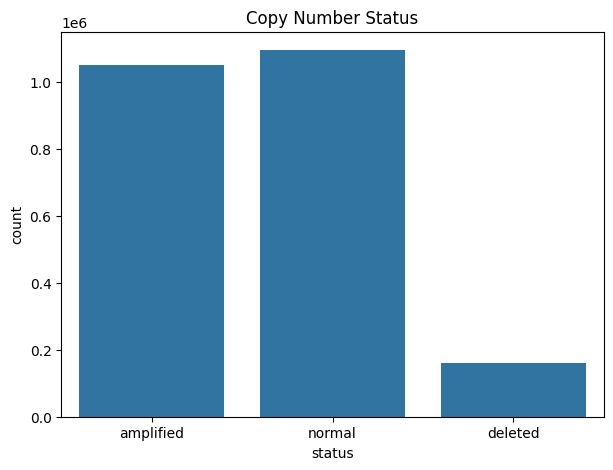

In [54]:
# plot the count of each status
plt.figure(figsize=(7, 5))
sns.countplot(data=combined_df, x='status')
plt.title('Copy Number Status')
plt.show()


### Distribution of Copy Number Variations


unique copy numbers = [  4.  nan   5.  14.   7.   9.   3.  13.   8.   2.  12.  10.  11.   6.
   0.   1.  34.  45.  33.  26. 380. 362. 194. 353.  23.  42.  22.  15.
  32.  56. 357.  62. 329.  48. 340. 190.  79. 113. 106. 105.  94.  20.
  61.  17.  35. 165. 168. 170. 281. 134.  50.  59.  16.  24.  40.  41.
  38.  37. 101.  18.  21. 304.]
total number of unique copy numbers = 62


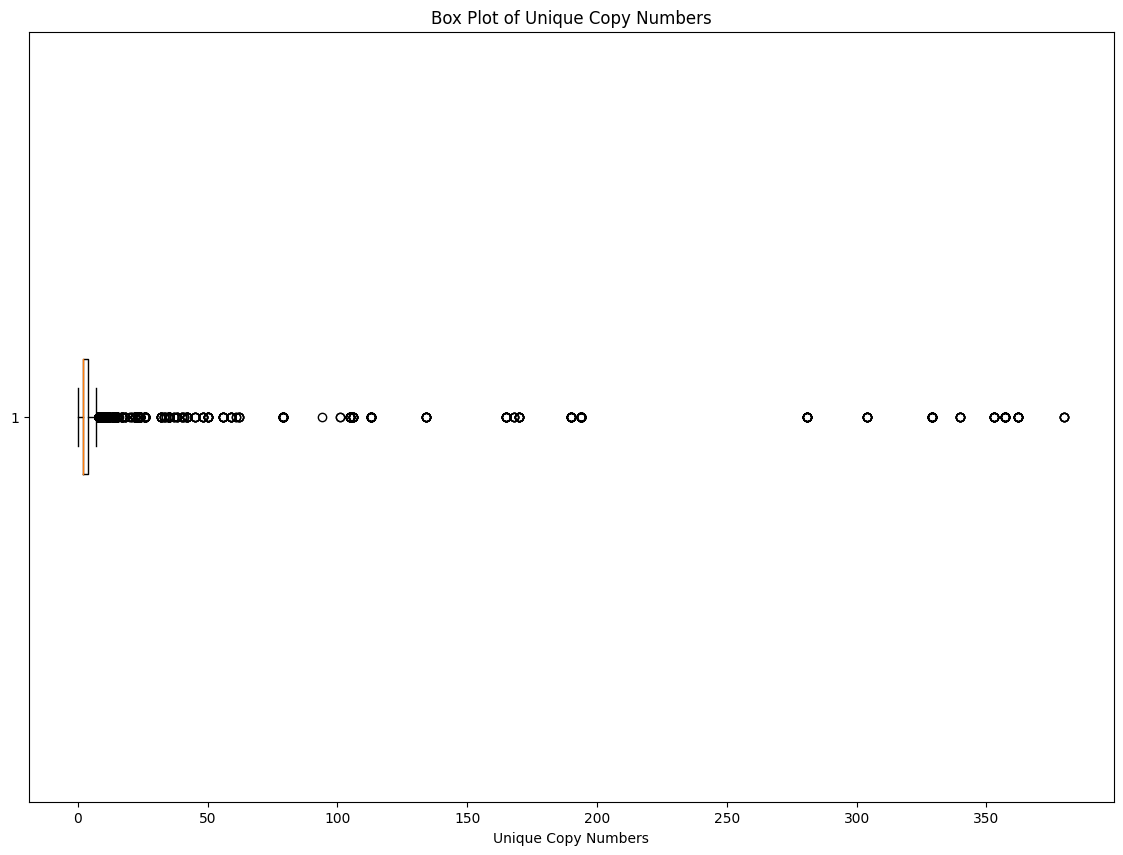

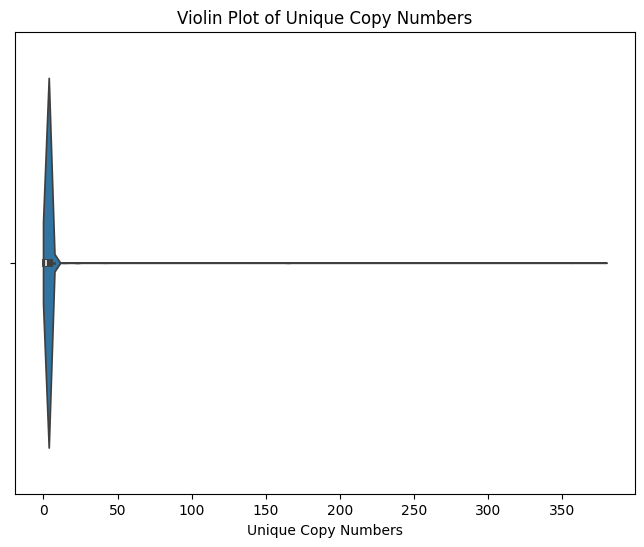

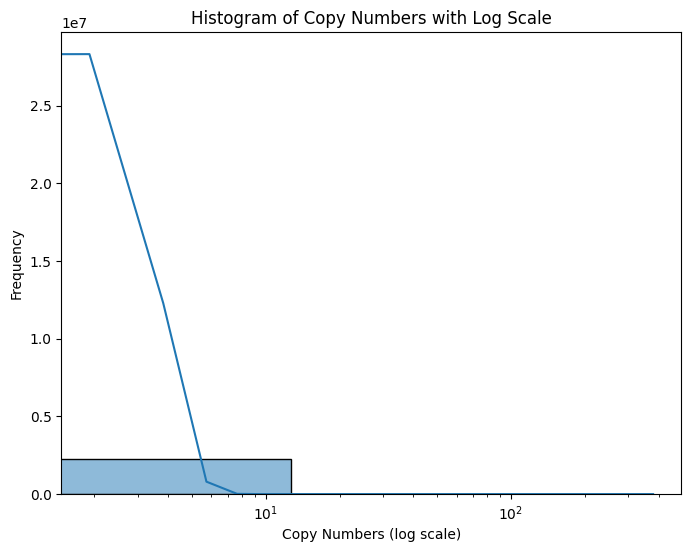

In [84]:
#find unique number of copy numbers
copy_numbers = combined_df['copy_number'].unique()
print("unique copy numbers = " + str(copy_numbers))
print("total number of unique copy numbers = " + str(len(copy_numbers)))


# Drop NaN values from the 'copy_number' column
copy_numbers = combined_df['copy_number'].dropna()

# Plot
plt.figure(figsize=(14, 10))
plt.boxplot(copy_numbers, vert=False)
plt.xlabel('Unique Copy Numbers')
plt.title('Box Plot of Unique Copy Numbers')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x=copy_numbers)
plt.xlabel('Unique Copy Numbers')
plt.title('Violin Plot of Unique Copy Numbers')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(copy_numbers, bins=30, kde=True)
plt.xscale('log')
plt.xlabel('Copy Numbers (log scale)')
plt.ylabel('Frequency')
plt.title('Histogram of Copy Numbers with Log Scale')
plt.show()